## Imports

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

## Reading in Data 

In [74]:
df = pd.read_csv('../datasets/subs2.csv', encoding='utf-8')


In [75]:
df.head()

,title,self_text,subreddit,text_words
0,Looking for Costa Rican Spanish speakers for a...,hey guys! i'm a linguistics phd student and i'...,0,123
1,Traveling to CR as a tica...,hi! i am costa_rican-american but have never b...,0,167
2,Puerto Viejo,"sunset pic on the caribbean coast, thanks to s...",0,11
3,Bought a bed. They made it right in front of me!,nice craftsmanship and impressed they built an...,0,26
4,How can I give back to Costa Rica?,"hi, if i move to costa_rica part time as an am...",0,36


## Reading in Custom Stopwords


In [76]:
stopwords_df = pd.read_csv('../datasets/custom_stopwords.csv')
stopwords_new = stopwords_df['custom_stopwords'].tolist()
stopwords = stopwords.words('english')
stopwords_custom = stopwords +stopwords_new

## Setting up Data 

In [77]:
X= df['self_text']
y=df['subreddit']

## Train Test Split 

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Setting up stemming and lemmatizing 

In [79]:
def lemmatize(words):
    split_words = words.split()
    lem = WordNetLemmatizer()
    return ' '.join([lem.lemmatize(word) for word in split_words])

In [80]:
def stem(words):
    split_words = words.split()
    stem = PorterStemmer()
    return ' '.join([stem.stem(word) for word in split_words])

## Gridsearch with KNN

In [81]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('knn', KNeighborsClassifier())
     ])

In [82]:
params = {
    'cvec__stop_words' : [None, "english", stopwords_custom, stopwords_new],
    'cvec__preprocessor': [None, lemmatize, stem],
    'cvec__ngram_range': [(1,3), (1,1), (1,2), (2,2)],
    'knn__n_neighbors': [3, 5, 7, 10] 
}

gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)

C:\Users\seefe\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  warnings.warn(
C:\Users\seefe\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  warnings.warn(
C:\Users\seefe\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  warnings.warn(
C:\Users\seefe\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_word

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'cvec__ngram_range': [(1, 3), (1, 1), (1, 2), (2, 2)],
                         'cvec__preprocessor': [None,
                                                <function lemmatize at 0x0000023198C95E10>,
                                                <function stem at 0x0000023198C96050>],
                         'cvec__stop_words': [None, 'english',
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               '...
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...],
                                              ['thanks', 'good', 'know', 'want',
                                               'time', 'just', 'like', 'day',
                                               've', 'wa', 'don', 'de',
                                               'thanks', 'que', 'hi', 'hey',
                                               'anyone', 'us', 'get', 'also',
                                               'https', 'ha', 'le', 'un', 'el',
                                               'la', 'en', 'es']],
                         'knn__n_neighbors': [3, 5, 7, 10]})

In [83]:
print('Train:', gs.score(X_train, y_train))
print('Test:', gs.score(X_test, y_test))

Train: 0.7089201877934272
Test: 0.5762910798122066


In [84]:
gs.best_params_

{'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': <function __main__.stem(words)>,
 'cvec__stop_words': ['thanks',
  'good',
  'know',
  'want',
  'time',
  'just',
  'like',
  'day',
  've',
  'wa',
  'don',
  'de',
  'thanks',
  'que',
  'hi',
  'hey',
  'anyone',
  'us',
  'get',
  'also',
  'https',
  'ha',
  'le',
  'un',
  'el',
  'la',
  'en',
  'es'],
 'knn__n_neighbors': 7}

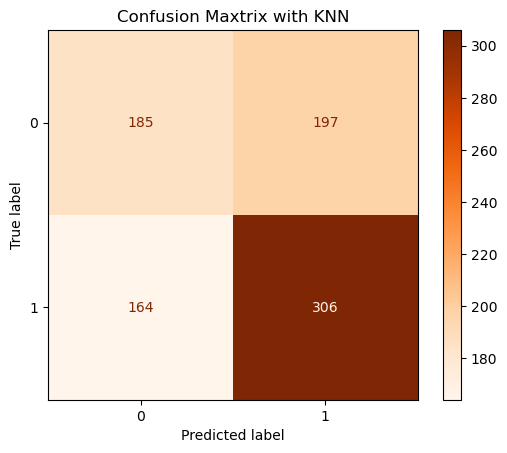

In [85]:
preds = gs.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap=plt.cm.Oranges)
plt.title("Confusion Maxtrix with KNN");
plt.savefig('../pictures/Confusion Maxtrix with KNN.png', format='png')